# 영화 관객수는 어떤것에 영향을 받나

## 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

## 전처리

In [3]:
df = pd.read_excel('data/영화개봉.xlsx')

In [4]:
df.head(3)

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국,전국.1,전국.2,서울,서울.1,장르,등급,영화구분
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,스크린수,매출액,관객수,매출액,관객수,NaN,NaN,NaN
1,1.0,명량,김한민,(주)빅스톤픽쳐스,NaN,씨제이이앤엠(주),2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화
2,2.0,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",NaN,씨제이이앤엠(주),2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16786 entries, 0 to 16785
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순번      16785 non-null  float64       
 1   영화명     16785 non-null  object        
 2   감독      16100 non-null  object        
 3   제작사     5896 non-null   object        
 4   수입사     11506 non-null  object        
 5   배급사     16226 non-null  object        
 6   개봉일     16775 non-null  datetime64[ns]
 7   영화유형    16785 non-null  object        
 8   영화형태    16784 non-null  object        
 9   국적      16784 non-null  object        
 10  전국      16786 non-null  object        
 11  전국.1    16664 non-null  object        
 12  전국.2    16786 non-null  object        
 13  서울      16658 non-null  object        
 14  서울.1    16786 non-null  object        
 15  장르      16705 non-null  object        
 16  등급      16769 non-null  object        
 17  영화구분    16785 non-null  object        
dtypes: dat

In [6]:
df1 = pd.read_excel('data/영화정보.xlsx')

In [7]:
df1.head(3)

,영화명,영화명(영문),제작연도,제작국가,유형,장르,제작상태,감독,제작사
0,엽기적인 그녀,My Sassy Girl,2001.0,한국,장편,코미디,개봉,곽재용,(주)신씨네
1,이웃사촌,Best Friend,2020.0,한국,장편,"드라마,코미디",개봉,이환경,"(주)시네마허브,환타지엔터테인먼트"
2,다시 만난 날들,Da Capo,2019.0,한국,장편,"뮤지컬,드라마,멜로/로맨스",개봉,심찬양,(주)푸른나무픽쳐스


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18072 entries, 0 to 18071
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      18072 non-null  object 
 1   영화명(영문)  15325 non-null  object 
 2   제작연도     17494 non-null  float64
 3   제작국가     18039 non-null  object 
 4   유형       18069 non-null  object 
 5   장르       17879 non-null  object 
 6   제작상태     17927 non-null  object 
 7   감독       16427 non-null  object 
 8   제작사      5966 non-null   object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [9]:
movie = pd.merge(df,df1,how='outer',on='영화명')
movie.drop(['순번','감독_y','제작사_y','배급사','영화유형','영화형태','전국.1','서울','서울.1','장르_x','영화구분','제작연도','유형','제작상태','영화명(영문)','제작국가','수입사'],axis=1,inplace=True)

In [10]:
movie.head(10)

,영화명,감독_x,제작사_x,개봉일,국적,전국,전국.2,등급,장르_y
0,NaN,NaN,NaN,NaT,NaN,스크린수,관객수,NaN,NaN
1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,한국,1587,17613682,15세이상관람가,"사극,액션"
2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",2019-01-23,한국,1978,16264944,15세이상관람가,코미디
3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,한국,1912,14410754,12세이상관람가,"판타지,드라마"
4,국제시장,윤제균,"(주)제이케이필름,씨제이이앤엠(주)",2014-12-17,한국,966,14245998,12세이상관람가,드라마
5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,2019-04-24,미국,2835,13934592,12세이상관람가,"액션,SF"
6,겨울왕국 2,"크리스 벅,제니퍼 리",NaN,2019-11-21,미국,2648,13747792,전체관람가,애니메이션
7,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,2009-12-17,미국,912,13624328,12세이상관람가,"SF,액션,어드벤처"
8,베테랑,류승완,"(주)외유내강,(주)필름케이",2015-08-05,한국,1064,13395400,15세이상관람가,"액션,드라마"
9,괴물,봉준호,영화사청어람(주),2006-07-27,한국,0,13019740,12세관람가,"SF,가족,드라마"


In [11]:
movie.rename(columns={'감독_x':'감독','제작사_x':'제작사','국적':'국가','전국':'스크린수','전국.2':'관객수','장르_y':'장르'},inplace=True)

In [12]:
movie.drop('제작사',axis=1,inplace=True)

In [13]:
movie

,영화명,감독,개봉일,국가,스크린수,관객수,등급,장르
0,NaN,NaN,NaT,NaN,스크린수,관객수,NaN,NaN
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상관람가,"사극,액션"
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상관람가,코미디
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상관람가,"판타지,드라마"
4,국제시장,윤제균,2014-12-17,한국,966,14245998,12세이상관람가,드라마
...,...,...,...,...,...,...,...,...
19296,2005년 미장센 단편영화제,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19297,서울독립영화제2005,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19298,제6회 서울유럽영화제[2005.10.26-10.30],NaN,NaT,NaN,NaN,NaN,NaN,NaN
19299,CJ 아시아인디영화제[2005.11.3-11.8],NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [14]:
movie.drop(0,inplace=True)

In [15]:
movie.isnull().sum()

영화명        0
감독      2330
개봉일     1564
국가      1555
스크린수    1554
관객수     1554
등급      1578
장르       475
dtype: int64

In [16]:
movie = movie.dropna()

In [17]:
movie.head()

,영화명,감독,개봉일,국가,스크린수,관객수,등급,장르
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상관람가,"사극,액션"
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상관람가,코미디
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상관람가,"판타지,드라마"
4,국제시장,윤제균,2014-12-17,한국,966,14245998,12세이상관람가,드라마
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,미국,2835,13934592,12세이상관람가,"액션,SF"


In [18]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16637 entries, 1 to 17746
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     16637 non-null  object        
 1   감독      16637 non-null  object        
 2   개봉일     16637 non-null  datetime64[ns]
 3   국가      16637 non-null  object        
 4   스크린수    16637 non-null  object        
 5   관객수     16637 non-null  object        
 6   등급      16637 non-null  object        
 7   장르      16637 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.1+ MB


In [19]:
movie = movie.astype({'스크린수':'int','관객수':'int'})

In [20]:
movie.rename(columns={'등급':'관람가'},inplace=True)

In [21]:
movie.head(3)

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상관람가,"사극,액션"
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상관람가,코미디
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상관람가,"판타지,드라마"


In [22]:
movie.관람가.unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '12세관람가', '15세관람가', '18세관람가',
       '청소년관람불가', '12세이상관람가,12세관람가', '15세관람가,15세이상관람가',
       '청소년관람불가,15세이상관람가', '18세 미만인 자는 관람할 수 없는 등급', '18세관람가,15세이상관람가',
       '18세관람가,청소년관람불가', '12세이상관람가,전체관람가', '12세이상관람가,15세이상관람가',
       '15세이상관람가,전체관람가', '제한상영가', '15세관람가,12세이상관람가',
       '15세 미만인 자는 관람할 수 없는 등급', '모든 관람객이 관람할 수 있는 등급',
       '12세 미만인 자는 관람할 수 없는 등급'], dtype=object)

In [23]:
movie.관람가 = movie.관람가.replace({'12세 미만인 자는 관람할 수 없는 등급':'12세이상관람가','모든 관람객이 관람할 수 있는 등급':'전체관람가','18세 미만인 자는 관람할 수 없는 등급':'18세이상관람가'})
movie.관람가 = movie.관람가.replace({'청소년관람불가':'19세이상관람가','12세이상관람가,12세관람가':'12세이상관람가','15세관람가,15세이상관람가':'15세이상관람가'})
movie.관람가 = movie.관람가.replace({'15세관람가':'15세이상관람가','18세관람가,청소년관람불가':'18세이상관람가','18세관람가':'18세이상관람가','12세이상관람가,전체관람가':'전체관람가','청소년관람불가,15세이상관람가':'15세이상관람가'})
movie.관람가 = movie.관람가.apply(lambda x:x.split('관')[0])

In [24]:
movie[movie.관람가 == '제한상영가']

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르
8384,허스,김정중,2007-08-02,한국,0,597,제한상영가,"드라마,멜로/로맨스"


In [25]:
movie.drop(8384,axis=0,inplace=True)

In [26]:
movie.관람가 = movie.관람가.apply(lambda x:x.split('관')[0])

In [27]:
movie.head(3)

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상,"사극,액션"
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상,코미디
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상,"판타지,드라마"


In [28]:
movie.장르 = movie.장르.apply(lambda x:x.split(',')[0])

In [29]:
movie['개봉연도'] = movie.개봉일.dt.year
movie['개봉달'] = movie.개봉일.dt.month

In [30]:
# movie.loc[(movie['관객수'] >= 10000000),'등급'] = '1'
# movie.loc[(movie['관객수'] <= 10000000) & (movie['관객수'] >= 5000000),'등급'] = '2'
# movie.loc[(movie['관객수'] <= 5000000) & (movie['관객수'] >= 1000000),'등급'] = '3'
# movie.loc[(movie['관객수'] <= 1000000) & (movie['관객수'] >= 100000),'등급'] = '4'
# movie.loc[(movie['관객수'] <= 100000) & (movie['관객수'] >= 1),'등급'] = '5'

In [31]:
movie = movie[movie.관객수 >= 1000]

In [32]:
movie[movie.관객수.duplicated()]

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르,개봉연도,개봉달
31,엑시트,이상근,2019-07-31,한국,1660,9426051,12세이상,스릴러,2019,7
63,럭키,이계벽,2016-10-13,한국,1158,6965706,15세이상,가족,2016,10
69,범죄도시,강윤성,2017-10-03,한국,1315,6851297,19세이상,액션,2017,10
95,숨바꼭질,허정,2013-08-14,한국,779,5602543,15세이상,드라마,2013,8
97,숨바꼭질,존 폴슨,2005-02-25,미국,0,779200,15세이상,드라마,2005,2
...,...,...,...,...,...,...,...,...,...,...
7952,짐작보다 따뜻하게,이상민,2016-05-19,한국,5,1011,12세이상,드라마,2016,5
7954,트랜스아메리카,던컨 터커,2006-11-16,미국,0,1010,18세이상,드라마,2006,11
7958,코인라커,김태경,2015-05-28,한국,13,1008,19세이상,드라마,2015,5
7969,콜드 인 줄라이,짐 미클,2014-11-27,미국,20,1000,19세이상,드라마,2014,11


In [33]:
movie.drop_duplicates(subset='관객수',keep='first',inplace=True)

In [34]:
movie.drop_duplicates(subset='영화명',keep='first',inplace=True)

In [35]:
movie[movie.영화명.duplicated()]

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르,개봉연도,개봉달


In [36]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 1 to 7968
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     6205 non-null   object        
 1   감독      6205 non-null   object        
 2   개봉일     6205 non-null   datetime64[ns]
 3   국가      6205 non-null   object        
 4   스크린수    6205 non-null   int32         
 5   관객수     6205 non-null   int32         
 6   관람가     6205 non-null   object        
 7   장르      6205 non-null   object        
 8   개봉연도    6205 non-null   int64         
 9   개봉달     6205 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(5)
memory usage: 484.8+ KB


In [37]:
movie.관객수.mean()

492020.09347300563

In [38]:
movie.loc[(movie.관객수 >= 1000000),'흥행'] = '100만이상'

In [39]:
movie.loc[(movie.관객수 <= 1000000),'흥행'] = '100만이하'

In [40]:
movie.loc[(movie.관람가 == '18세'), '관람가'] = '18세이상'
movie.loc[(movie.관람가 == '12세'), '관람가'] = '12세이상'

In [41]:
movie['감독'] = movie.감독.apply(lambda x:x.split(',')[0])

In [42]:
movie.rename(columns={'개봉달':'개봉월'},inplace=True)

In [43]:
movie.head(3)

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르,개봉연도,개봉월,흥행
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상,사극,2014,7,100만이상
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상,코미디,2019,1,100만이상
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상,판타지,2017,12,100만이상


In [44]:
mo500 = movie[movie.흥행 == '100만이상']

In [45]:
movie.to_csv('./data/영화')

# 각 컬럼간의 상관관계 확인

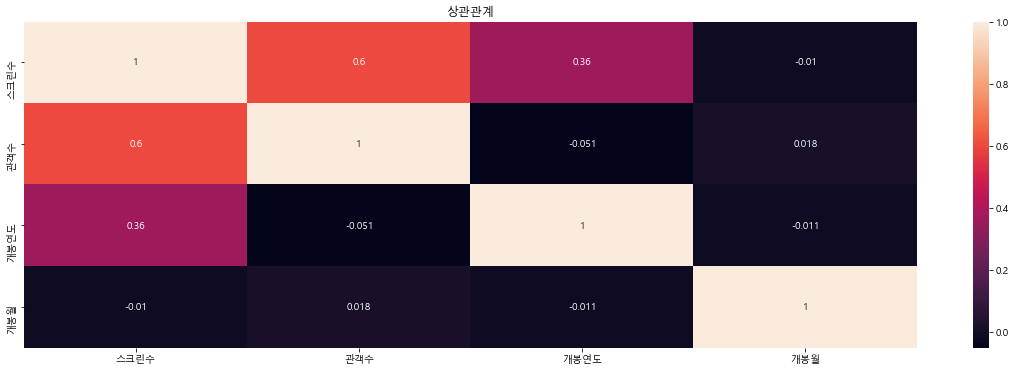

In [46]:
plt.figure(figsize=(20,6))
plt.title('상관관계')
sns.heatmap(movie.corr(),annot=True)
pass

## 흥행확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


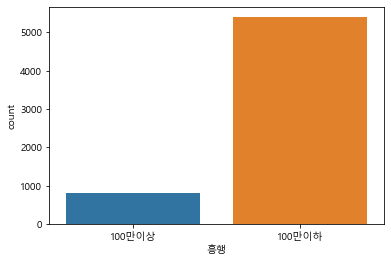

In [47]:
sns.countplot(movie.흥행)
pass

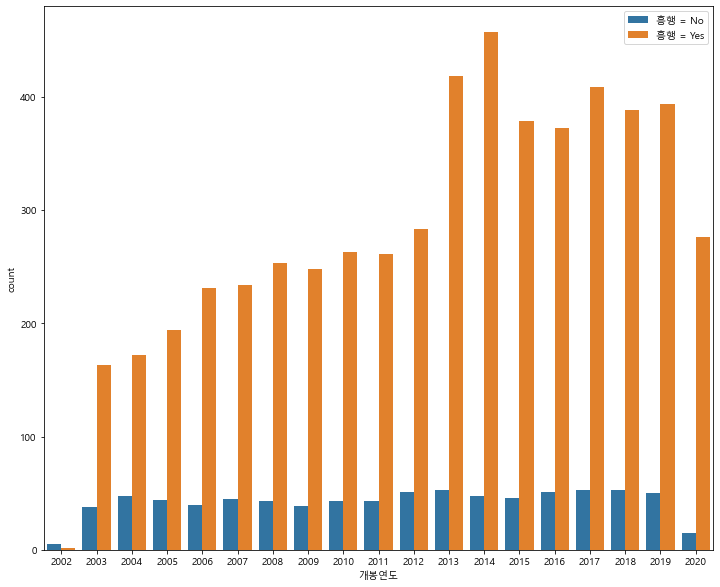

In [48]:
plt.figure(figsize=(12,10))
sns.countplot(x=movie.개봉연도,hue=movie.흥행)
plt.legend(['흥행 = No','흥행 = Yes'])

In [49]:
# 500만이상 작품이 생각보다 작아서 500만이상인 데이터들로 시각화

In [50]:
# mo500 = movie[movie.흥행 == '500만이상']
# fig,ax = plt.subplot(2,3,figsize=(16,10))
# sns.countplot(mo500.개봉연도,hue=mo500.흥행,ax=ax[0][0])
# sns.countplot(mo500.국가,hue=mo500.흥행,ax=ax[0][1])
# sns.countplot(mo500.장르,hue=mo500.흥행,ax=ax[0][2])
# sns.countplot(mo500.관람가,hue=mo500.흥행,ax=ax[1][0])
# sns.countplot(mo500.개봉월,hue=mo500.흥행,ax=ax[1][1])
# plt.xticks(rotation=50)
# pass

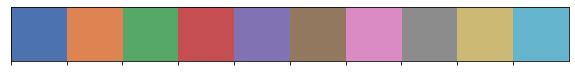

In [51]:
palette1 = sns.color_palette('deep',10)
sns.palplot(palette1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

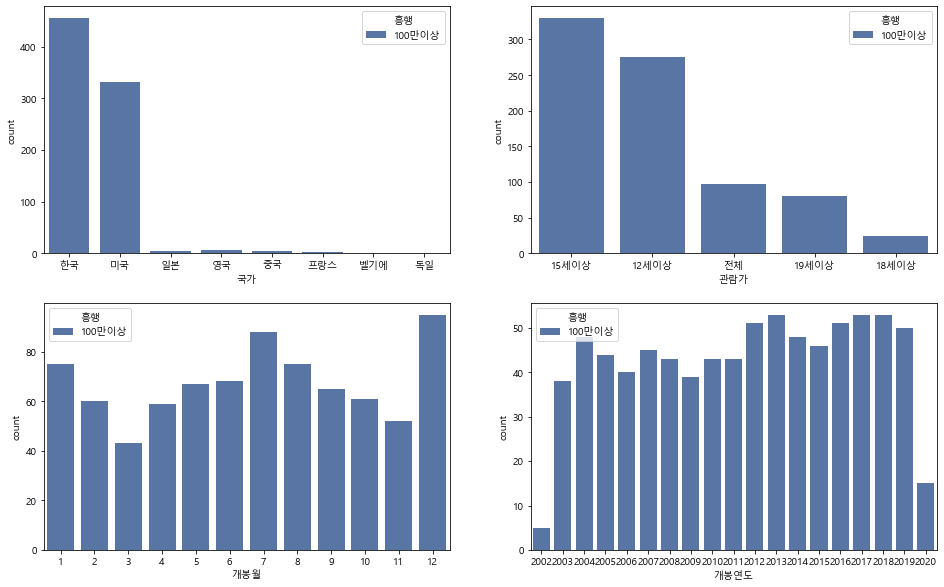

In [52]:
fig,ax = plt.subplots(2,2,figsize=(16,10))
sns.countplot(mo500.국가, hue = mo500.흥행,ax=ax[0][0],palette= palette1) 
sns.countplot(mo500.관람가, hue = mo500.흥행,ax=ax[0][1],palette= palette1)
sns.countplot(mo500.개봉월, hue = mo500.흥행,ax=ax[1][0],palette= palette1)
sns.countplot(mo500.개봉연도, hue = mo500.흥행,ax=ax[1][1],palette= palette1)
pass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


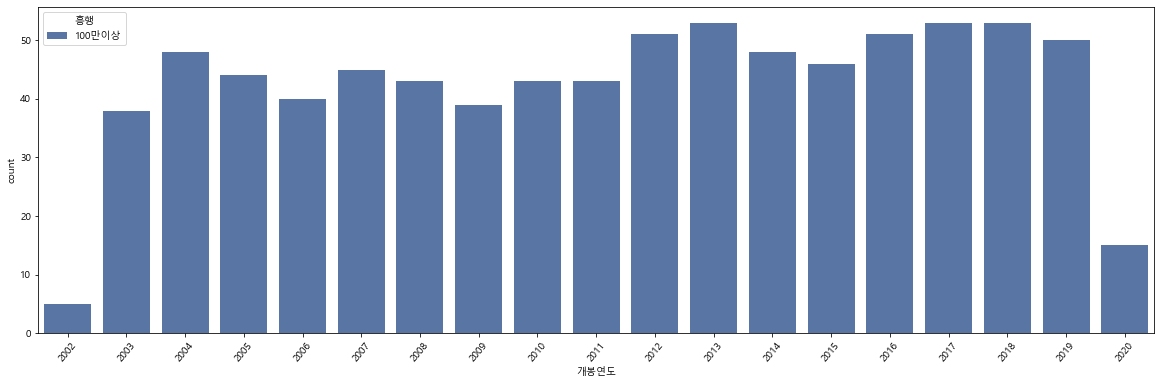

In [53]:
plt.figure(figsize=(20,6))
sns.countplot(mo500.개봉연도,hue=mo500.흥행,palette=palette1)
plt.xticks(rotation=50)
pass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


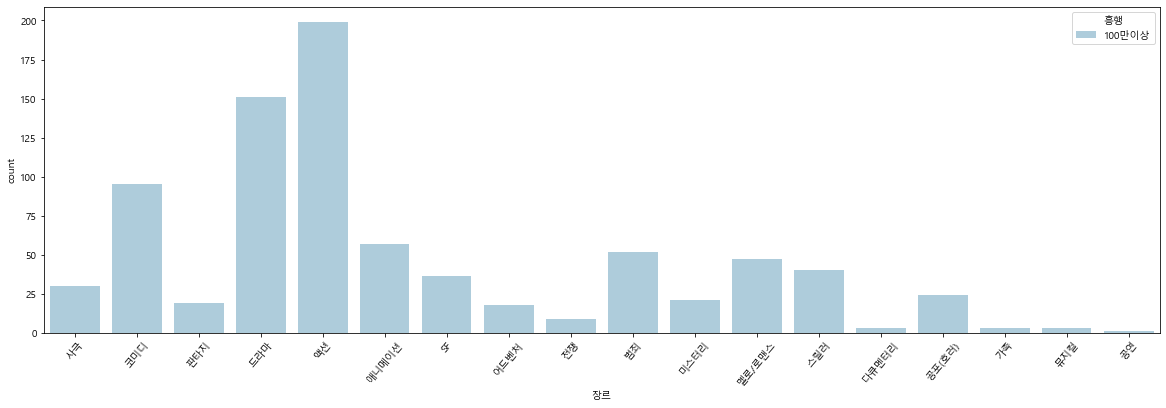

In [54]:
plt.figure(figsize=(20,6))
sns.countplot(mo500.장르,hue=mo500.흥행,palette='Paired')
plt.xticks(rotation=50)
pass

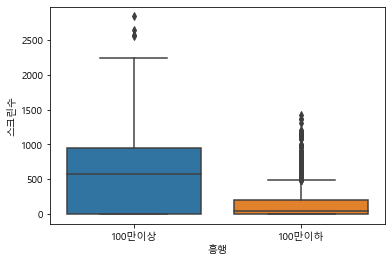

In [55]:
# 스크린수 흥행
sns.boxplot(x = movie.흥행,y=movie.스크린수)
pass

## 각 컬럼들 관객수관계

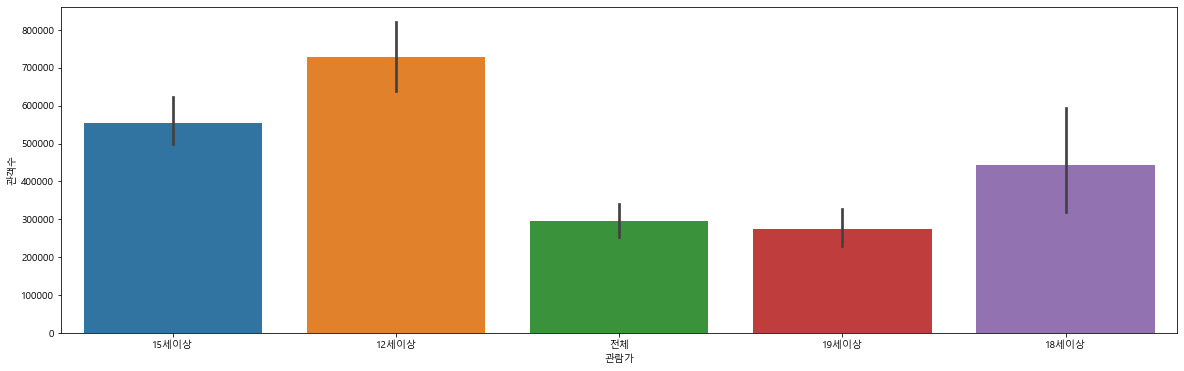

In [56]:
# 관람가 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie.관람가,y=movie.관객수)
pass

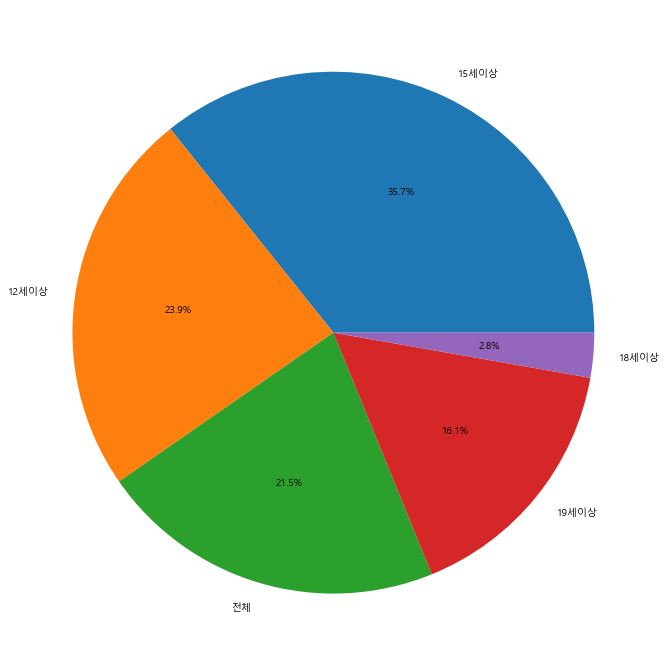

In [57]:
# 관람가
bar, ax = plt.subplots(figsize = (12,12))
plt.pie(movie['관람가'].value_counts(), labels = movie['관람가'].value_counts().index, autopct="%.1f%%")
pass

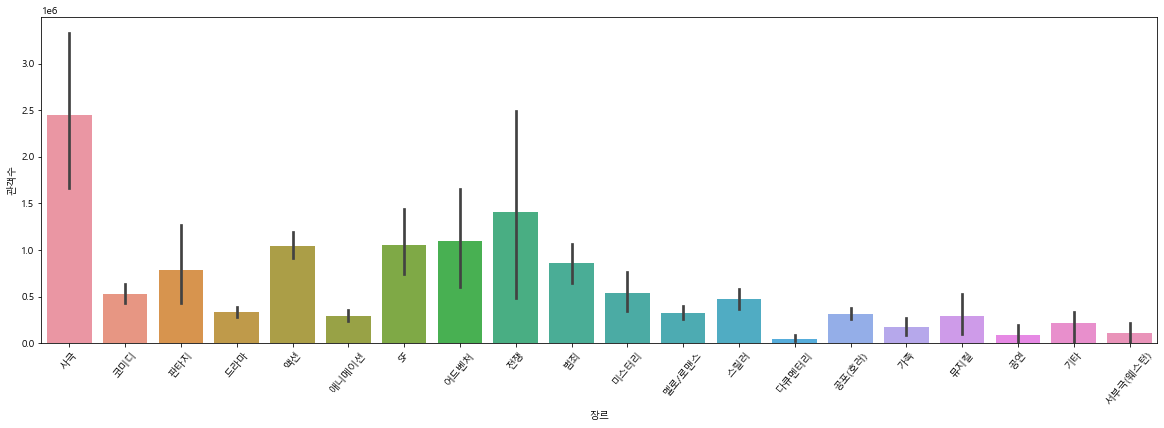

In [58]:
# 장르, 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie['장르'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

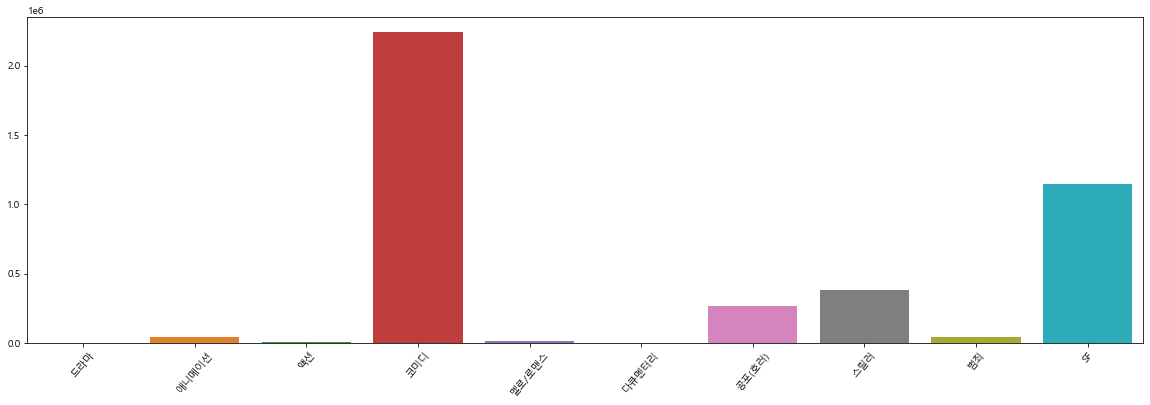

In [59]:
# 장르 관객수 상위10
plt.figure(figsize=(20,6))
sns.barplot(x=movie['장르'].value_counts().index[:10],y=movie['관객수'].value_counts().index[:10])
plt.xticks(rotation=50)
pass

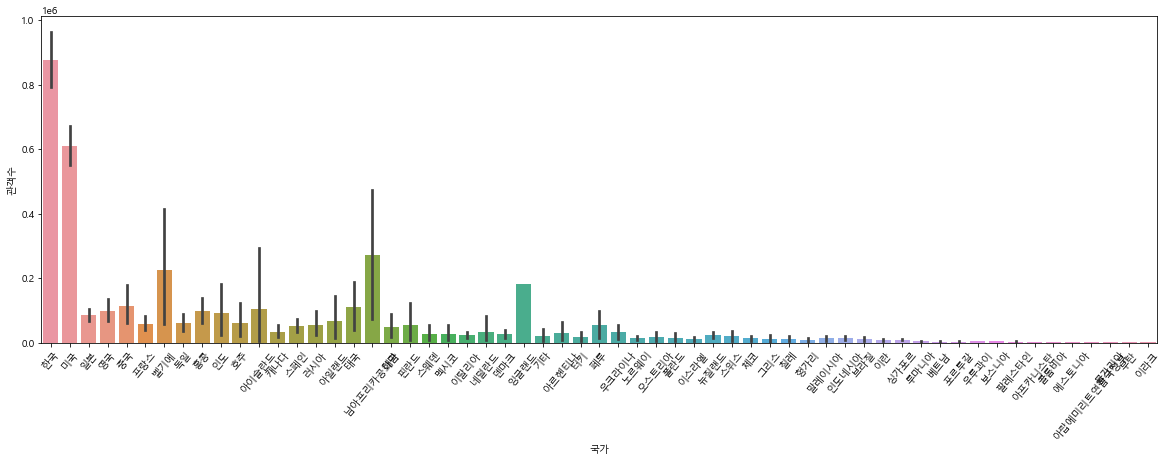

In [60]:
# 국가 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie['국가'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

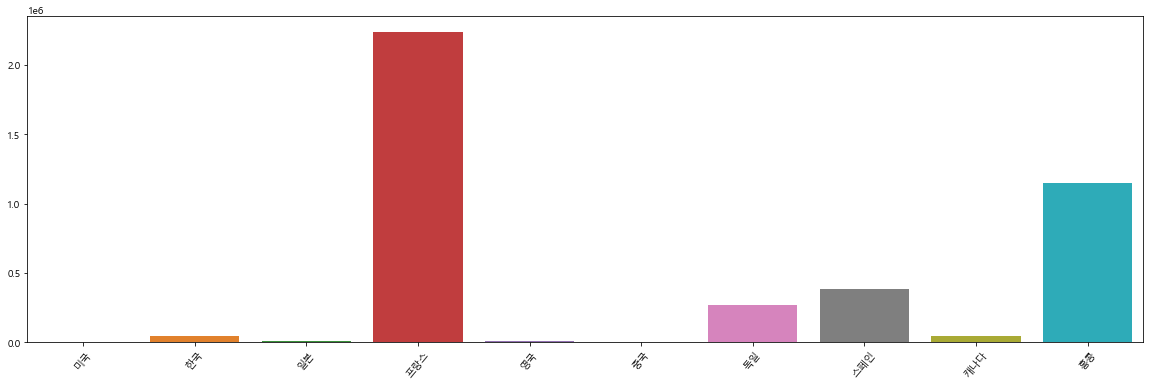

In [61]:
# 국가 관객수 상위10
plt.figure(figsize=(20,6))
sns.barplot(x=movie['국가'].value_counts().index[:10],y=movie['관객수'].value_counts().index[:10])
plt.xticks(rotation=50)
pass

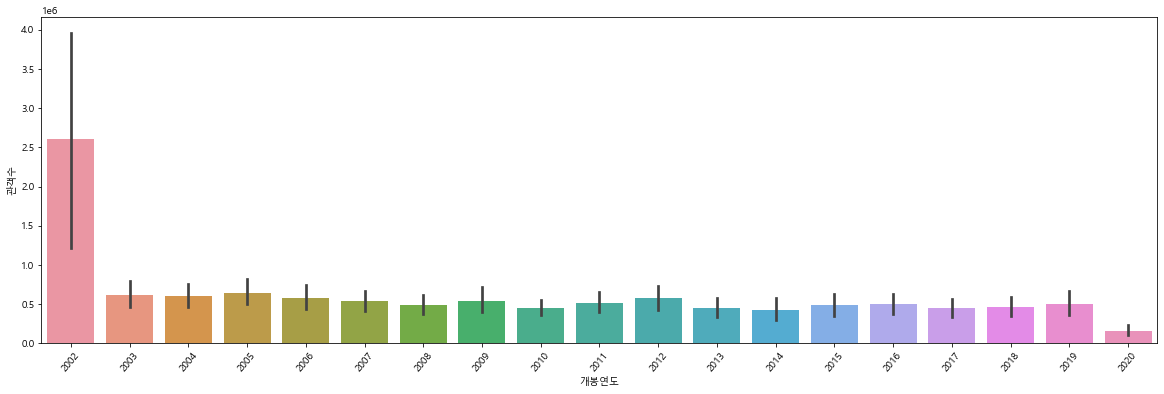

In [62]:
# 개봉연도 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie['개봉연도'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

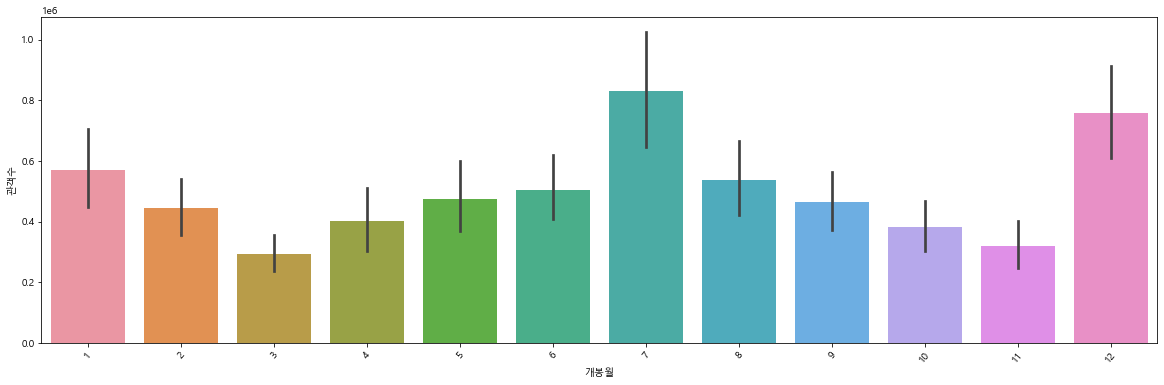

In [63]:
plt.figure(figsize=(20,6))
sns.barplot(x=movie['개봉월'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

## 감독흥행작품수

In [64]:
director = movie[['감독','흥행']]
director_df = director.value_counts().to_frame()
director_df = director_df.reset_index()
director_df.rename(columns={0:'작품수'},inplace=True)

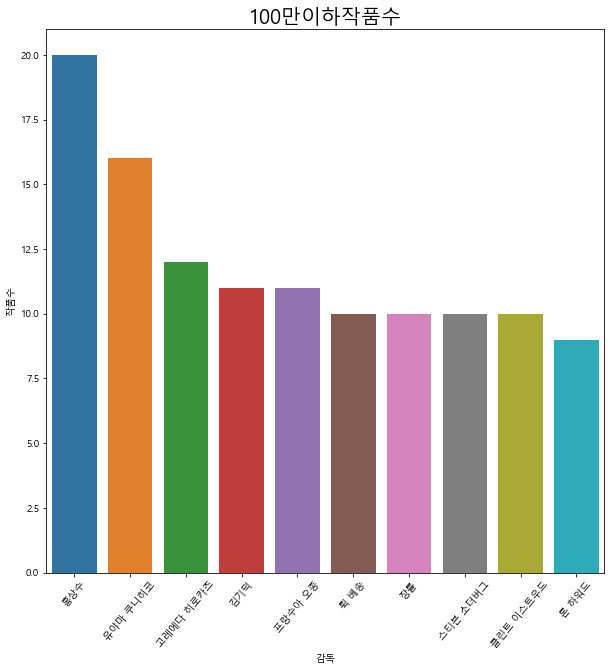

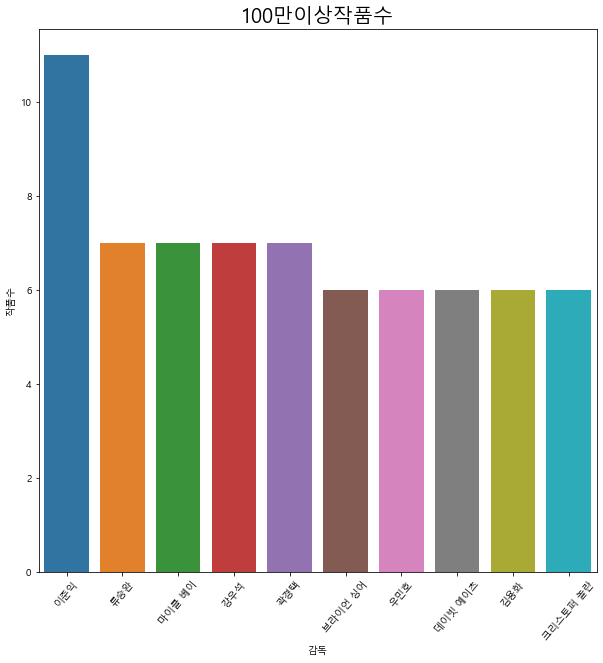

In [65]:
for i in director_df['흥행'].unique():
    bar, ax = plt.subplots(figsize=(10,10))
    sns.barplot(x = '감독', y = '작품수', data = director_df[director_df['흥행'] == i].iloc[:10])
    plt.ylabel('작품수')
    plt.title('{}작품수'.format(str(i)), size=20)
    plt.xticks(rotation=50)

In [66]:
# 알고리즘을 위해 int로
movie.loc[(movie.관객수 >= 1000000),'흥행'] = '1'
movie.loc[(movie.관객수 <= 1000000),'흥행'] = '0'
movie = movie.astype({'흥행':'int'})

In [67]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 1 to 7968
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     6205 non-null   object        
 1   감독      6205 non-null   object        
 2   개봉일     6205 non-null   datetime64[ns]
 3   국가      6205 non-null   object        
 4   스크린수    6205 non-null   int32         
 5   관객수     6205 non-null   int32         
 6   관람가     6205 non-null   object        
 7   장르      6205 non-null   object        
 8   개봉연도    6205 non-null   int64         
 9   개봉월     6205 non-null   int64         
 10  흥행      6205 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(5)
memory usage: 669.0+ KB


In [68]:
movie.head()

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르,개봉연도,개봉월,흥행
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상,사극,2014,7,1
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상,코미디,2019,1,1
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상,판타지,2017,12,1
4,국제시장,윤제균,2014-12-17,한국,966,14245998,12세이상,드라마,2014,12,1
5,어벤져스: 엔드게임,안소니 루소,2019-04-24,미국,2835,13934592,12세이상,액션,2019,4,1


In [69]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 1 to 7968
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     6205 non-null   object        
 1   감독      6205 non-null   object        
 2   개봉일     6205 non-null   datetime64[ns]
 3   국가      6205 non-null   object        
 4   스크린수    6205 non-null   int32         
 5   관객수     6205 non-null   int32         
 6   관람가     6205 non-null   object        
 7   장르      6205 non-null   object        
 8   개봉연도    6205 non-null   int64         
 9   개봉월     6205 non-null   int64         
 10  흥행      6205 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(5)
memory usage: 669.0+ KB


# 머신러닝

In [70]:
movie_df = movie.drop(['영화명','개봉일','관객수','감독'],axis=1)
movie_df

,국가,스크린수,관람가,장르,개봉연도,개봉월,흥행
1,한국,1587,15세이상,사극,2014,7,1
2,한국,1978,15세이상,코미디,2019,1,1
3,한국,1912,12세이상,판타지,2017,12,1
4,한국,966,12세이상,드라마,2014,12,1
5,미국,2835,12세이상,액션,2019,4,1
...,...,...,...,...,...,...,...
7956,한국,12,19세이상,범죄,2012,11,0
7960,한국,15,19세이상,드라마,2018,7,0
7961,한국,2,15세이상,다큐멘터리,2014,6,0
7967,영국,13,15세이상,드라마,2014,2,0


In [71]:
movie_d = pd.get_dummies(movie_df)
movie_d

,스크린수,개봉연도,개봉월,흥행,국가_그리스,국가_기타,국가_남아프리카공화국,국가_네덜란드,국가_노르웨이,국가_뉴질랜드,...,장르_범죄,장르_사극,장르_서부극(웨스턴),장르_스릴러,장르_애니메이션,장르_액션,장르_어드벤처,장르_전쟁,장르_코미디,장르_판타지
1,1587,2014,7,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1978,2019,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1912,2017,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,966,2014,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2835,2019,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,12,2012,11,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7960,15,2018,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7961,2,2014,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7967,13,2014,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y = movie_d['흥행']
x = movie_d.drop('흥행',axis=1)

## 패키지

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=33)

In [75]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [76]:
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(x_train,y_train))
scaled_m_train = minMaxScaler.fit_transform(x_train)
scaled_m_test = minMaxScaler.fit_transform(x_test)

MinMaxScaler()


### LinearRegression

In [77]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_lr))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))  
print('MAE:',metrics.mean_absolute_error(y_test,pred_lr))   
print('정확도:',r2_score(y_test,pred_lr))

MSE: 0.06186975455806647
RMSE: 0.24873631531818283
MAE: 0.17346577892443965
정확도: 0.41537708954186026


### LogisticRegression

In [78]:
log = LogisticRegression()
log.fit(scaled_m_train, y_train)
pred_log = log.predict(scaled_m_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_log))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_log)))  
print('MAE:',metrics.mean_absolute_error(y_test,pred_log))   
print('정확도:',r2_score(y_test,pred_log))

MSE: 0.06176154672395274
RMSE: 0.2485187049780212
MAE: 0.06176154672395274
정확도: 0.4163995726495727


### RandomForestRegressor

In [79]:
rd = RandomForestRegressor()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_rd))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_rd)))  
print('MAE:',metrics.mean_absolute_error(y_test,pred_rd))   
print('정확도:',r2_score(y_test,pred_rd))

MSE: 0.047545259025996725
RMSE: 0.21804875378226019
MAE: 0.08503593166589944
정확도: 0.5507328595561667


### SVC

In [80]:
svc = SVC()
svc.fit(scaled_m_train,y_train)
pred_svc = svc.predict(scaled_m_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_svc))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_svc)))  
print('MAE:',metrics.mean_absolute_error(y_test,pred_svc))   
print('정확도:',r2_score(y_test,pred_svc))

MSE: 0.079484425349087
RMSE: 0.28192982344740863
MAE: 0.079484425349087
정확도: 0.24893162393162405


### XGBRegressor

In [81]:
xgb = XGBRegressor()
xgb.fit(scaled_m_train,y_train)
pred_xgb = xgb.predict(scaled_m_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_xgb))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))  
print('MAE:',metrics.mean_absolute_error(y_test,pred_xgb))   
print('정확도:',r2_score(y_test,pred_xgb))

MSE: 0.054909664376294944
RMSE: 0.23432811264612477
MAE: 0.10407785097361999
정확도: 0.4811447365639524


### Lasso

In [82]:
la = Lasso()
la.fit(x_train,y_train)
pred_la = la.predict(x_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_la))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_la)))  
print('MAE:',metrics.mean_absolute_error(y_test,pred_la))   
print('정확도:',r2_score(y_test,pred_la))

MSE: 0.07252344956398056
RMSE: 0.26930178158337637
MAE: 0.15719434289701903
정확도: 0.3147076392429209


### Ridge

In [83]:
ri = Ridge()
ri.fit(x_train,y_train)
pred_ri = ri.predict(x_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_ri)) 
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_ri)))  
print('MAE:',metrics.mean_absolute_error(y_test,pred_ri))   
print('정확도:',r2_score(y_test,pred_ri))

MSE: 0.061819030378069274
RMSE: 0.24863433065059473
MAE: 0.1732304990009806
정확도: 0.4158563951080837
